In [1]:
copy "https://research.collegeboard.org/media/xlsx/Trends-in-Student-Aid-2023-excel-data.xlsx" ///
    Trends-in-Student-Aid-2023-excel-data.xlsx, replace

## Download and import total grad and undergrad enrollment from NCES / IPEDS / HEGIS

In [2]:
copy "https://nces.ed.gov/programs/digest/d23/tables/xls/tabn303.80.xlsx" tabn303.80.xlsx, replace

In [79]:
import excel using tabn303.80.xlsx, cellrange(A3:B57) firstrow clear

(2 vars, 54 obs)


In [80]:
rename Year year
destring year, replace
drop if year==1

year: all characters numeric; replaced as int
(1 observation deleted)


In [81]:
rename Total totalenrollment
gen typestudent="grad"

In [82]:
replace year=year+1

(53 real changes made)


In [83]:
list


     +----------------------------+
     | year   totale~t   typest~t |
     |----------------------------|
  1. | 1971    1212243       grad |
  2. | 1972    1204390       grad |
  3. | 1973    1272421       grad |
  4. | 1974    1342452       grad |
  5. | 1975    1425001       grad |
     |----------------------------|
  6. | 1976    1505404       grad |
  7. | 1977    1577546       grad |
  8. | 1978    1569084       grad |
  9. | 1979    1575693       grad |
 10. | 1980    1571922       grad |
     |----------------------------|
 11. | 1981    1621840       grad |
 12. | 1982    1617150       grad |
 13. | 1983    1600718       grad |
 14. | 1984    1618666       grad |
 15. | 1985    1623869       grad |
     |----------------------------|
 16. | 1986    1650381       grad |
 17. | 1987    1705536       grad |
 18. | 1988    1720407       grad |
 19. | 1989    1738789       grad |
 20. | 1990    1796029       grad |
     |----------------------------|
 21. | 1991    1859531     

In [84]:
save d_ipeds_grad_enrollment_1971_2023, replace

file d_ipeds_grad_enrollment_1971_2023.dta saved


In [114]:
copy "https://nces.ed.gov/programs/digest/d23/tables/xls/tabn303.70.xlsx" tabn303.70.xlsx, replace

In [115]:
import excel using tabn303.70.xlsx, cellrange(A3:B46) firstrow clear

(2 vars, 43 obs)


In [116]:
drop if _n<3

(2 observations deleted)


In [117]:
rename Levelandyear year
destring year, replace

year: all characters numeric; replaced as int


In [118]:
rename Total totalenrollment
gen typestudent="undergrad"

In [119]:
replace year=year+1

(41 real changes made)


In [120]:
append using d_ipeds_grad_enrollment_1971_2023

In [121]:
save d_ipeds_undergrad_grad_enrollment_1971_2023, replace

(file d_ipeds_undergrad_grad_enrollment_1971_2023.dta not found)
file d_ipeds_undergrad_grad_enrollment_1971_2023.dta saved


## Import and reshape counts of borrowers for all students, undergrads, and grads (not including parents in all categories). Grads does not include grad plus borrowers who did not also borrow using Grad Stafford (should be rare)

In [15]:
import excel using Trends-in-Student-Aid-2023-excel-data.xlsx, sheet("Table 6") ///
    cellrange(A5:AC74) clear

(29 vars, 70 obs)


In [16]:
keep if _n==1 | _n==39 | _n==70

(67 observations deleted)


In [17]:
local num 1995

foreach k in `c(ALPHA)' {
rename `k' borrowers`num'
    local num = 1+`num'
    }

In [18]:
%head

,borrowers1995,borrowers1996,borrowers1997,borrowers1998,borrowers1999,borrowers2000,borrowers2001,borrowers2002,borrowers2003,borrowers2004,borrowers2005,borrowers2006,borrowers2007,borrowers2008,borrowers2009,borrowers2010,borrowers2011,borrowers2012,borrowers2013,borrowers2014,borrowers2015,borrowers2016,borrowers2017,borrowers2018,borrowers2019,borrowers2020,AA,AB,AC
1,# Borrowers (000),4396.157,4640.823,4770.932000000001,4842.883,4897.527,4991.645,5352.594,5883.646000000001,6492.161,6923.929,7151.704000000001,7288.445,7744.951999999999,8657.380000000001,10176.901,11030.96881161608,11101.18403122428,10519.418,9504.802,9047.913,8569.563,8226.503999999999,7948.456,7650.967,7383.894,6837.666999999999,6477.592,6386.020160749966
2,# Borrowers (000),3738.938,3956.199,4099.568,4153.347,4197.788,4279.459,4581.964,5002.639,5493.328,5838.993,6016.735000000001,6111.442,6473.407999999999,7290.391000000001,8581.310395951026,9437.906999999999,9505.18,9024.366,8029.063,7601.389,7130.807,6781.48,6501.629,6201.749,5950.578,5386.245,5075.968,5037.297652981327
3,# Borrowers (000),657.2190000000001,684.624,671.364,689.5359999999999,699.739,712.1859999999999,770.63,881.0070000000001,998.8330000000001,1084.936,1134.969,1177.003,1271.544,1366.989,1595.590604048974,1593.061811616082,1596.004031224276,1495.052,1475.739,1446.524,1438.756,1445.024,1446.827,1449.218,1433.316,1451.422,1401.624,1348.722507768639


In [19]:
drop borrowers1995

In [20]:
rename AA borrowers2021
rename AB borrowers2022
rename AC borrowers2023

In [21]:
gen typestudent="all" if _n==1
replace typestudent="undergrad" if _n==2
replace typestudent="grad" if _n==3

(2 missing values generated)
variable typestudent was str3 now str9
(1 real change made)
(1 real change made)


In [22]:
reshape long borrowers, i(typestudent) j(year)

(j = 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
>  2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023)

Data                               Wide   ->   Long
-----------------------------------------------------------------------------
Number of observations                3   ->   84          
Number of variables                  29   ->   3           
j variable (28 values)                    ->   year
xij variables:
borrowers1996 borrowers1997 ... borrowers2023->borrowers
-----------------------------------------------------------------------------


In [23]:
%head

,typestudent,year,borrowers
1,all,1996,4396.157
2,all,1997,4640.823
3,all,1998,4770.932000000001
4,all,1999,4842.883
5,all,2000,4897.527


In [24]:
save d_borrower_counts_studentaid_trends1996_2023, replace

file d_borrower_counts_studentaid_trends1996_2023.dta saved


## Import and then append borrowing amounts by all students, undergrad, and grad

In [25]:
import excel using Trends-in-Student-Aid-2023-excel-data.xlsx, sheet("Table 3") ///
    cellrange(A2:J54) firstrow clear

(10 vars, 52 obs)


In [26]:
rename AllStudents year

In [27]:
gen typestudent="all"

In [28]:
save d_allstudentaid_trends1971_2023, replace

file d_allstudentaid_trends1971_2023.dta saved


In [29]:
import excel using Trends-in-Student-Aid-2023-excel-data.xlsx, sheet("Table 3") ///
    cellrange(A55:J88) firstrow clear

(10 vars, 33 obs)


In [30]:
gen typestudent="undergrad"

In [31]:
rename UndergraduateStudents year

In [32]:
save d_undergradstudentaid_trends1971_2023, replace

file d_undergradstudentaid_trends1971_2023.dta saved


In [122]:
import excel using Trends-in-Student-Aid-2023-excel-data.xlsx, sheet("Table 3") ///
    cellrange(A89:J122) firstrow clear

(10 vars, 33 obs)


In [123]:
gen typestudent="grad"

In [124]:
rename GraduateStudents year

In [125]:
append using d_undergradstudentaid_trends1971_2023

(variable typestudent was str4, now str9 to accommodate using data's values)


In [126]:
append using d_allstudentaid_trends1971_2023

In [127]:
replace year=substr(year, 1,4)
destring year, replace

(118 real changes made)
year: all characters numeric; replaced as int


In [128]:
replace year=year+1

(118 real changes made)


In [129]:
merge 1:1 typestudent year using d_borrower_counts_studentaid_trends1996_2023, nogen


    Result                      Number of obs
    -----------------------------------------
    Not matched                            34
        from master                        34  
        from using                          0  

    Matched                                84  
    -----------------------------------------


In [130]:
merge 1:1 typestudent year using d_ipeds_undergrad_grad_enrollment_1971_2023.dta, keep(1 3) nogen update


    Result                      Number of obs
    -----------------------------------------
    Not matched                            52
        from master                        52  
        from using                          0  

    Matched                                66
        not updated                        66  
        missing updated                     0  
        nonmissing conflict                 0  
    -----------------------------------------


In [131]:
destring borrowers, replace

borrowers: all characters numeric; replaced as double
(34 missing values generated)


In [132]:
replace borrowers=borrowers*1000

(84 real changes made)


In [133]:
gen pct_borrowing=borrowers / totalenrollment * 100

(62 missing values generated)


In [134]:
label var year year
save d_long_trends_in_student_aid1972_2023, replace

file d_long_trends_in_student_aid1972_2023.dta saved


In [135]:
encode typestudent, gen(typestudentn)

In [136]:
xtset typestudentn year


Panel variable: typestudentn (unbalanced)
 Time variable: year, 1972 to 2023
         Delta: 1 unit


In [137]:
drop if typestudent=="all"

(52 observations deleted)


In [138]:
label var pct_borrowing "% of students who borrow"

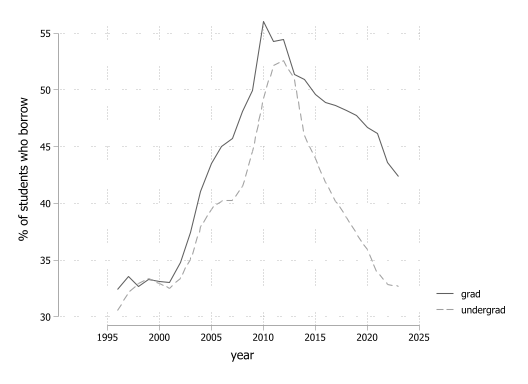

In [140]:
xtline pct_borrowing if year > 1990, overlay schem(plotplain) xlabel(1995(5)2025)

In [62]:
%head if year>2000

,year,FullTimeEquivalentEnrollment,TotalAidinMillions,AverageTotalAidperFTE,TotalGrantAidinMillions,AverageGrantAidperFTE,TotalFederalLoanAidinMill,AverageFederalLoansperFTE,TotalFederalandNonfederalLoa,AverageFederalandNonfederalL,typestudent,borrowers,totalenrollment,_merge,pct_borrowing,typestudentn
31,2001,1443411,29930.116,20735.685,10590.184,7336.9152,18068.103,12517.643,20317.383,14075.951,grad,712.186,.,Matched (3),.,grad
32,2002,1484019,31160.001,20997.036,10666.302,7187.443,19127.587,12889.045,21822.507,14705.005,grad,770.63,.,Matched (3),.,grad
33,2003,1592958,34269.092,21512.866,10595.409,6651.4051,22144.868,13901.728,25788.613,16189.136,grad,881.007,.,Matched (3),.,grad
34,2004,1664306,37848.861,22741.528,11095.69,6666.8567,25099.136,15080.842,28972.156,17407.951,grad,998.833,.,Matched (3),.,grad
35,2005,1714360,41081.747,23963.314,12188.795,7109.8222,27128.57,15824.314,31935.455,18628.208,grad,1084.936,.,Matched (3),.,grad


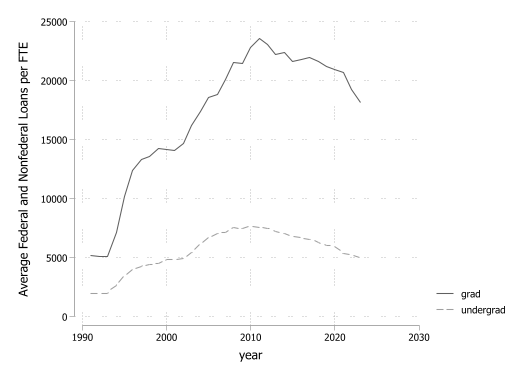

In [72]:
xtline AverageFederalandNonfederalL, overlay schem(plotplain)

In [73]:
gen borrowing_billions=TotalFederalLoanAidinMill/1000

In [74]:
label var borrowing_billions "borrowing in billions (2022 $)"

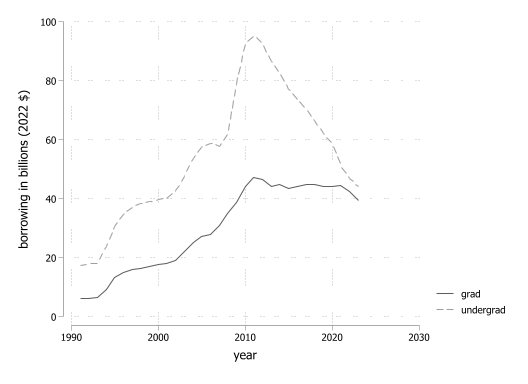

In [75]:
xtline borrowing_billions, overlay schem(plotplain)